# Blockchain data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Bitcoin price index

We are going to download the bitcoin exchange rate information to USD and make some plots. Let us start with the bitcoin prices. The data is retrieved from the website [CoinDesk](https://www.coindesk.com/price/bitcoin)

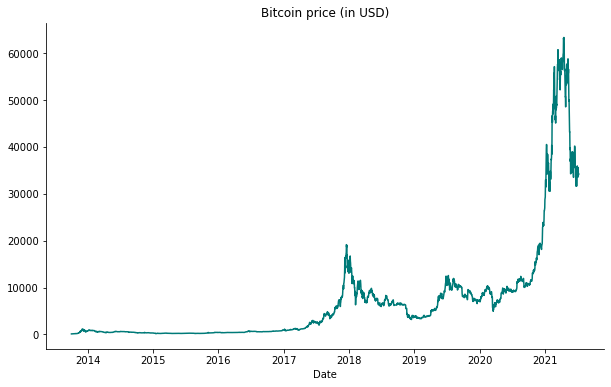

In [23]:
π_BTC_data = pd.read_csv("../Data/BTC_USD_2013-10-01_2021-07-08-CoinDesk.csv")
df = π_BTC_data
π_BTC_data.columns
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(pd.to_datetime(df['Date']), df['Closing Price (USD)'], color=(0,0.478,0.47), label='Windspeed')
ax.set_xlabel('Date')
ax.set_title('Bitcoin price (in USD)')
sns.despine()